Analysis done working through tutorial at: https://pv-tutorials.github.io/2024_PVSC/Tutorial%201%20-%20TMY%20Weather%20Data.html

## Import Python Libraries

In [125]:
import pvlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

## Import Weather and Irradiation Data

In [126]:
# Open weather data from an epw file
# Downloaded from https://re.jrc.ec.europa.eu/pvg_tools/en/
# See user manual at https://joint-research-centre.ec.europa.eu/photovoltaic-geographical-information-system-pvgis/getting-started-pvgis/pvgis-user-manual_en
df_tmy = pd.read_csv('data/PVGIS_tmy_data.csv', index_col=0, parse_dates=True)

In [127]:
# the TMY data contains a row for every hour of the year the index currently shows with true year the data was recorded
# this is because the TMY takes the [median?] of the data since 2005 to 2023
# to ease data visualisation I will override the index year value to a dummy of 2024
# df_tmy.index = df_tmy.index.map(lambda x: x.replace(year=2024))
# df_tmy.index = df_tmy.index + pd.Timedelta(hours=1)
# df = df.loc['2024-05-10':'2024-05-20']
display(df_tmy.head(20))
display(df_tmy.keys())
print("Number of rows:", len(df_tmy))
print("Number of columns:", len(df_tmy.columns))


,temp_air,relative_humidity,ghi,dni,dhi,IR(h),wind_speed,wind_direction,pressure
time(UTC),,,,,,,,,
2018-01-01 00:00:00+00:00,6.00,82.79,0.0,0.00,0.0,296.99,4.79,258.0,97580.0
2018-01-01 01:00:00+00:00,5.71,82.47,0.0,0.00,0.0,292.74,5.04,251.0,97670.0
2018-01-01 02:00:00+00:00,5.41,82.14,0.0,0.00,0.0,288.50,5.28,247.0,97700.0
2018-01-01 03:00:00+00:00,5.12,81.82,0.0,0.00,0.0,284.25,5.53,244.0,97730.0
2018-01-01 04:00:00+00:00,4.83,81.49,0.0,0.00,0.0,280.01,5.77,243.0,97710.0
2018-01-01 05:00:00+00:00,4.53,81.17,0.0,0.00,0.0,275.76,6.02,237.0,97650.0
2018-01-01 06:00:00+00:00,4.24,80.84,0.0,0.00,0.0,271.51,6.26,227.0,97580.0
2018-01-01 07:00:00+00:00,3.94,80.52,0.0,0.00,0.0,267.27,6.51,210.0,97450.0
2018-01-01 08:00:00+00:00,4.12,85.50,0.0,0.00,0.0,275.75,3.31,199.0,97380.0


Index(['temp_air', 'relative_humidity', 'ghi', 'dni', 'dhi', 'IR(h)',
       'wind_speed', 'wind_direction', 'pressure'],
      dtype='object')

Number of rows: 8760
Number of columns: 9


In [128]:
# ghi, dhi, dni are irradiance measurements, temp_air is the air temperature, and wind_speed is the wind speed.
df_tmy = df_tmy[['ghi', 'dhi', 'dni', 'temp_air', 'wind_speed']]
df_tmy.columns = ['GHI', 'DHI', 'DNI', 'Temperature', 'Wind Speed'] # rename columns to be more readable

df_tmy.head(20)

,GHI,DHI,DNI,Temperature,Wind Speed
time(UTC),,,,,
2018-01-01 00:00:00+00:00,0.0,0.0,0.00,6.00,4.79
2018-01-01 01:00:00+00:00,0.0,0.0,0.00,5.71,5.04
2018-01-01 02:00:00+00:00,0.0,0.0,0.00,5.41,5.28
2018-01-01 03:00:00+00:00,0.0,0.0,0.00,5.12,5.53
2018-01-01 04:00:00+00:00,0.0,0.0,0.00,4.83,5.77
2018-01-01 05:00:00+00:00,0.0,0.0,0.00,4.53,6.02
2018-01-01 06:00:00+00:00,0.0,0.0,0.00,4.24,6.26
2018-01-01 07:00:00+00:00,0.0,0.0,0.00,3.94,6.51
2018-01-01 08:00:00+00:00,0.0,0.0,0.00,4.12,3.31


In [129]:
# The April data that PV-GIS provides comes from 2007 which is the sunniest April in recent history!
# I cannot explain why this is happening but it is clear this is not a 'typical' April.
# Instead I will import all the historical hourly data from 2005 to 2023
# determine the median month for total GHI and construct my own TMY.

# import csv from PV-GIS

# Define the file path
input_file = 'data/PVGIS_hourly_data_historical.csv'

# Read the CSV file, skipping the first two rows and parsing dates
df_historical = pd.read_csv(input_file, parse_dates=True, index_col=0)

# Truncate the minutes to the nearest hour
truncated_index = df_historical.index.floor('H')

# Calculate how much the time has been truncated by
time_truncated_by = df_historical.index - truncated_index

# Apply the truncated index to the DataFrame
df_historical.index = truncated_index


# Display the first few rows of the processed DataFrame
df_historical.loc['2018-01-01':].head(20)

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_18355/2308708576.py:15: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



,GHI,DNI,DHI,Temperature,Wind Speed
0,,,,,
2018-01-01 00:00:00,0.00,0.00,0.00,5.14,6.41
2018-01-01 01:00:00,0.00,0.00,0.00,4.68,6.69
2018-01-01 02:00:00,0.00,0.00,0.00,4.60,6.97
2018-01-01 03:00:00,0.00,0.00,0.00,4.52,6.97
2018-01-01 04:00:00,0.00,0.00,0.00,5.08,7.03
2018-01-01 05:00:00,0.00,0.00,0.00,5.09,6.14
2018-01-01 06:00:00,0.00,0.00,0.00,4.89,5.38
2018-01-01 07:00:00,0.00,0.00,0.00,4.28,3.93
2018-01-01 08:00:00,0.00,0.00,0.00,4.12,3.31


### Explore the Historical Data

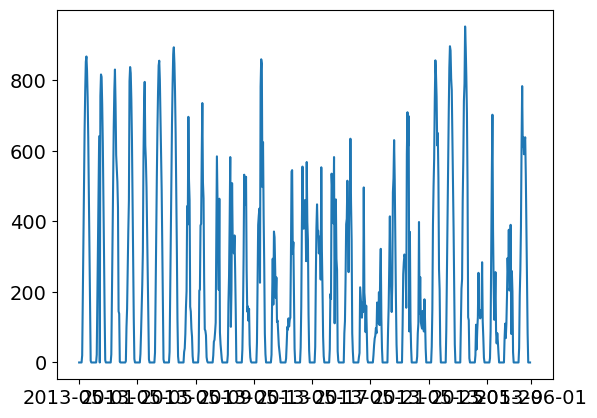

In [130]:
year = 2013
month = 5
df_filtered = df_historical[df_historical.index.to_period('M') == f'{year}-{month:02d}']
df_filtered.head()
plt.plot(df_filtered['GHI'])


In [131]:
# select data source!
# df = df_tmy
df = df_historical[df_historical.index.year == 2023]

Text(0, 0.5, 'Irradiance [W/m$^2$]')

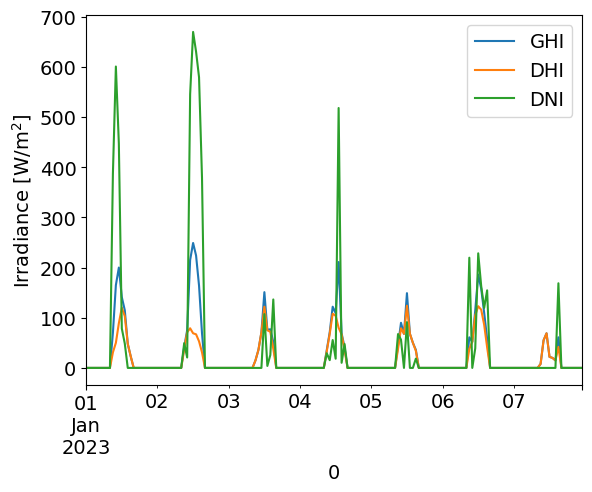

In [132]:
# Plotting the three irradiance fields

first_week = df.head(24*7) # Plotting 7 days, each one has 24 hours or entries
first_week[['GHI', 'DHI', 'DNI']].plot()
# first_week[['GHI']].plot()
plt.ylabel('Irradiance [W/m$^2$]')

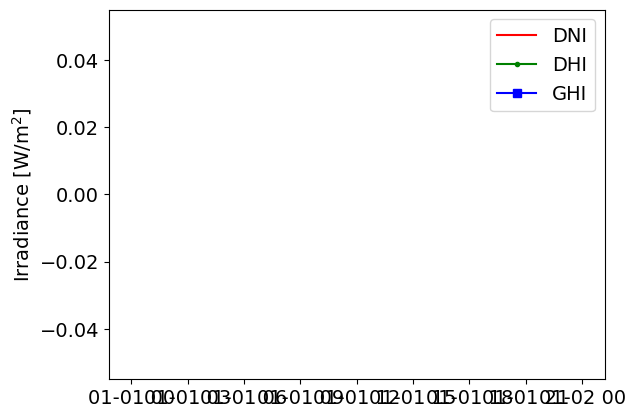

In [133]:
birthday = df.loc['2018-01-07':'2018-01-07']
plt.plot(birthday['DNI'], color='r') 
plt.plot(birthday['DHI'], color='g', marker='.') 
plt.plot(birthday['GHI'], color='b', marker='s') 
plt.ylabel('Irradiance [W/m$^2$]')
plt.legend(['DNI', 'DHI', 'GHI'])

Text(0.5, 0, '')

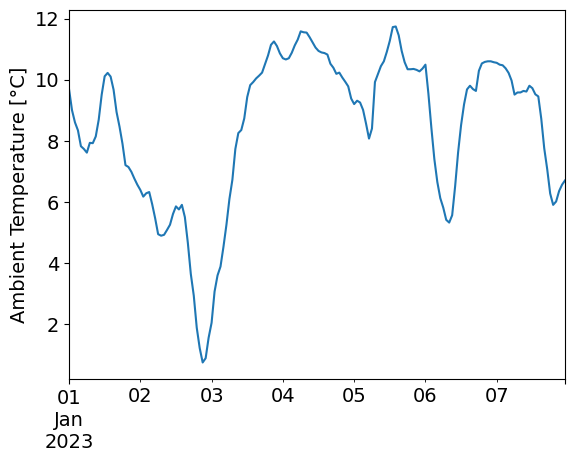

In [134]:
first_week['Temperature'].plot()
plt.ylabel('Ambient Temperature [°C]');
plt.xlabel(None)

Text(0.5, 0, '')

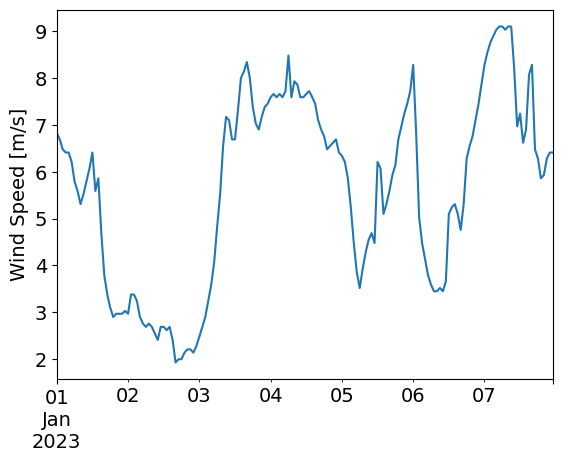

In [135]:
first_week['Wind Speed'].plot()
plt.ylabel('Wind Speed [m/s]')
plt.xlabel(None)

In [136]:
# summing hourly irradiance (W/m^2) gives insolation (W h/m^2)
monthly_ghi = df['GHI'].resample('ME').sum()
monthly_ghi.head(12)

0
2023-01-31     29353.13
2023-02-28     39709.95
2023-03-31     63931.66
2023-04-30    112274.61
2023-05-31    176319.41
2023-06-30    184453.60
2023-07-31    142985.25
2023-08-31    136128.53
2023-09-30     97163.93
2023-10-31     60031.40
2023-11-30     30470.58
2023-12-31     15292.52
Freq: ME, Name: GHI, dtype: float64

Text(0.5, 0, '')

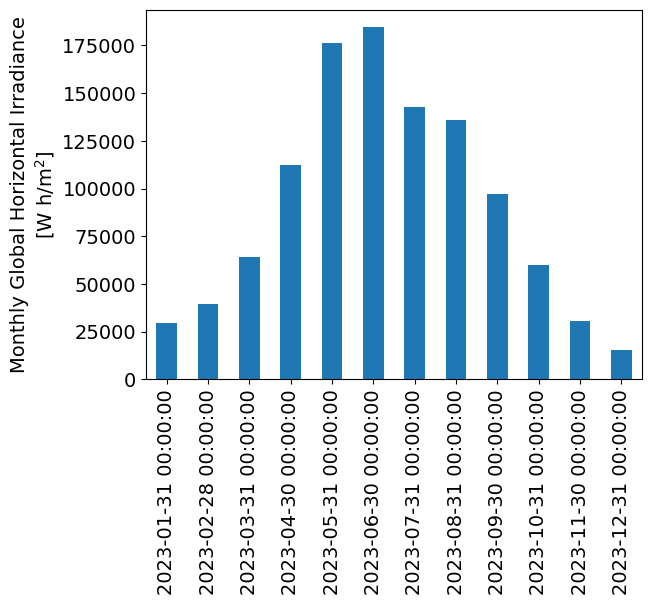

In [137]:
monthly_ghi = monthly_ghi.tz_localize(None)  # don't need timezone for monthly data
monthly_ghi.plot.bar()
plt.ylabel('Monthly Global Horizontal Irradiance\n[W h/m$^2$]');
plt.xlabel(None)

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_18355/1235302159.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



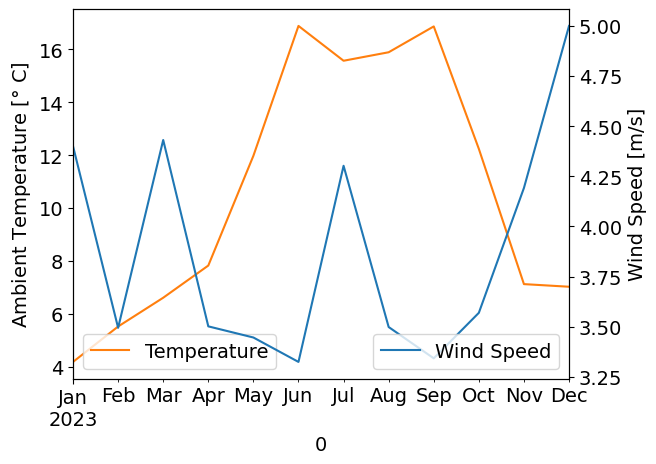

In [138]:
# Taking monthly averages instead of sums.

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # add a second y-axis
monthly_average_temp_wind = df[['Temperature', 'Wind Speed']].resample('M').mean()
monthly_average_temp_wind['Temperature'].plot(ax=ax1, c='tab:orange')
monthly_average_temp_wind['Wind Speed'].plot(ax=ax2, c='tab:blue')
ax1.set_ylabel(r'Ambient Temperature [$\degree$ C]')
ax2.set_ylabel(r'Wind Speed [m/s]')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

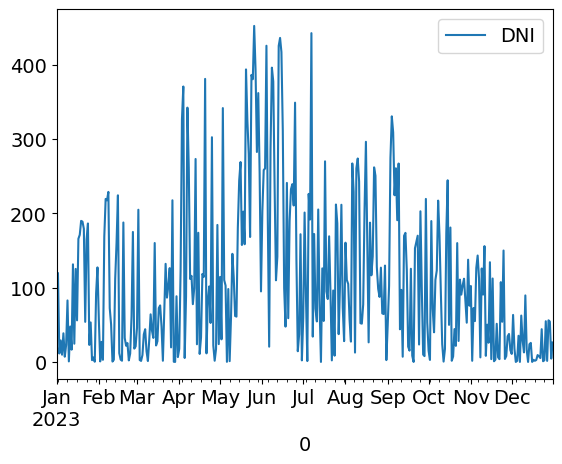

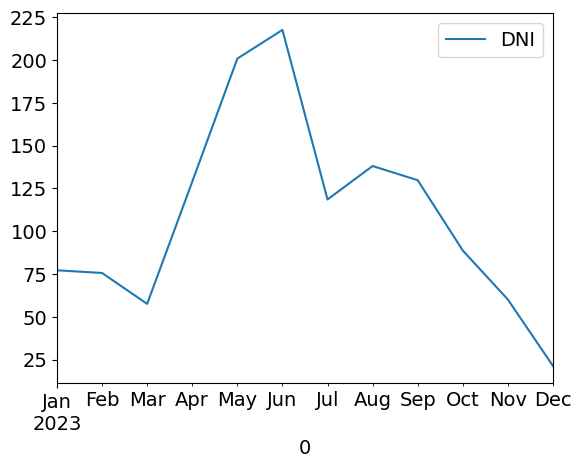

In [139]:
# Average DNI by DAY and by MONTH

try:
    daily_average_DNI = df[['DNI']].resample('D').mean()
    monthly_average_DNI = df[['DNI']].resample('ME').mean()  # Add the column name, and resample by day. Month is 'M', day is..
    daily_average_DNI.plot()
    monthly_average_DNI.plot()
except:
    print("You haven't finished this exercise correctly, try again!")

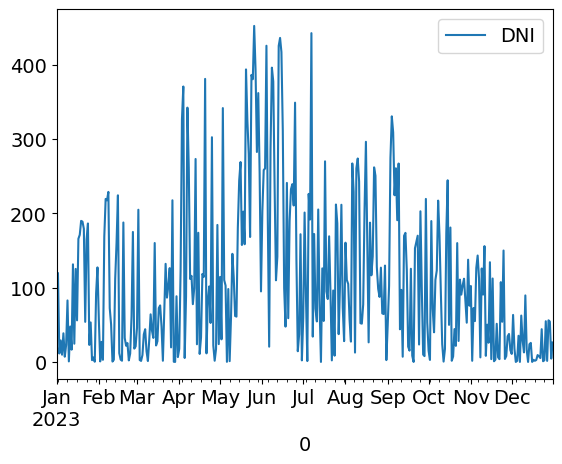

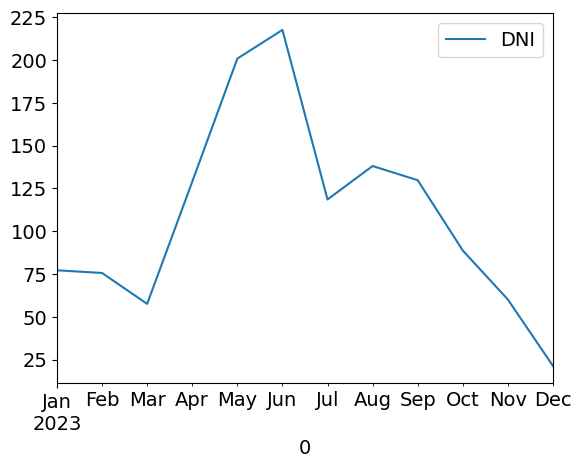

In [140]:
# Average DNI by DAY and by MONTH

try:
    daily_average_DNI = df[['DNI']].resample('D').mean()
    monthly_average_DNI = df[['DNI']].resample('ME').mean()  # Add the column name, and resample by day. Month is 'M', day is..
    daily_average_DNI.plot()
    monthly_average_DNI.plot()
except:
    print("You haven't finished this exercise correctly, try again!")

### Historical Monthly Insolation

,Annual Totals Summary
Mean,1082.086035
Median,1079.373430
Q1,1053.911120
Q3,1095.662028
Min,1019.034710
Max,1173.648260
Std,39.657733


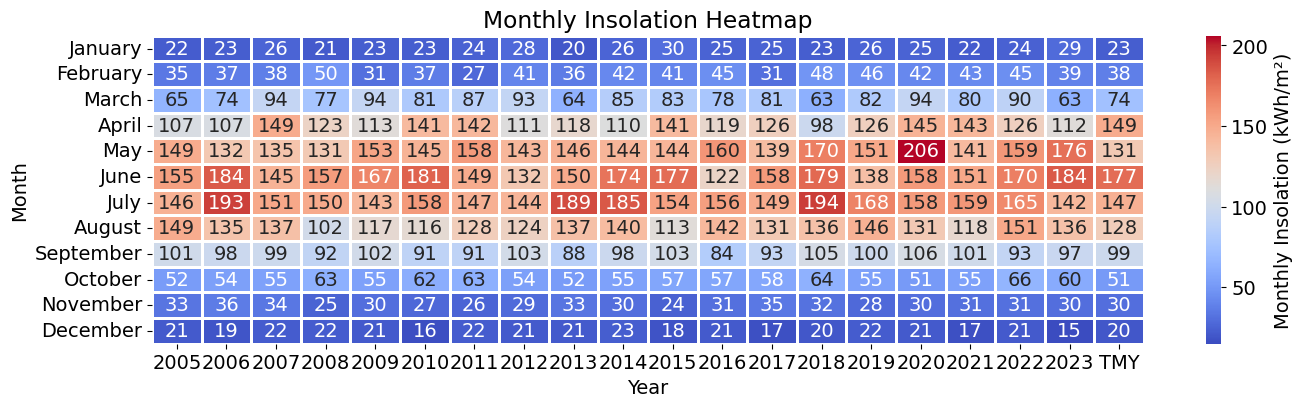

In [141]:
from plotly.subplots import make_subplots
from ipywidgets import Button, Dropdown, VBox
from IPython.display import display
import plotly.graph_objects as go


# Calculate monthly insolation for df_historical
df_historical['Month'] = df_historical.index.month
df_historical['Year'] = df_historical.index.year
monthly_insolation_historical = df_historical.groupby(['Year', 'Month'])['GHI'].sum().reset_index()
monthly_insolation_historical.rename(columns={'GHI': 'Monthly Insolation'}, inplace=True)
monthly_insolation_historical['Monthly Insolation'] /= 1000  # Convert to kWh

# Calculate monthly insolation for df_tmy
df_tmy['Month'] = df_tmy.index.month
df_tmy['Year'] = "TMY"
monthly_insolation_tmy = df_tmy.groupby(['Year', 'Month'])['GHI'].sum().reset_index()
monthly_insolation_tmy.rename(columns={'GHI': 'Monthly Insolation'}, inplace=True)
monthly_insolation_tmy['Monthly Insolation'] /= 1000  # Convert to kWh

# Calculate annual totals for historical data
annual_totals_historical = monthly_insolation_historical.groupby("Year")["Monthly Insolation"].sum()

# Calculate the annual total for TMY
annual_total_tmy = monthly_insolation_tmy["Monthly Insolation"].sum()

# Combine historical and TMY data into a single DataFrame
annual_totals = pd.concat(
    [annual_totals_historical, pd.Series({"TMY": annual_total_tmy})],
    axis=0
).rename("Annual Total")

# Create the subplot figure
fig = make_subplots(
    rows=1, 
    cols=2, 
    subplot_titles=("Monthly Insolation", "Annual Data"), 
    column_widths=[0.8, 0.2]  # Set the proportion to 4:1
)

# Update the theme
fig.update_layout(template="plotly_dark")

# Add monthly insolation data with different colors for each year
for year, group in monthly_insolation_historical.groupby("Year"):
    fig.add_trace(
        go.Scatter(
            x=group["Month"] + np.random.uniform(-0.2, 0.2, size=len(group)),  # Add jitter to x-axis
            y=group["Monthly Insolation"],
            mode="markers",
            name=str(year),
            marker=dict(
                size=5,  # Set marker size
                opacity=0.7  # Set marker transparency
            ),
        ),
        row=1,
        col=1,
    )

# Add TMY data to the plot
fig.add_trace(
    go.Scatter(
        x=monthly_insolation_tmy["Month"] + np.random.uniform(-0.2, 0.2, size=len(monthly_insolation_tmy)),  # Add jitter to x-axis
        y=monthly_insolation_tmy["Monthly Insolation"],
        mode="markers",
        name="TMY",
        marker=dict(
            size=12,  # Set marker size
            color="yellow",  # Set marker color
            opacity=0.9  # Set marker transparency
        ),
    ),
    row=1,
    col=1,
)

# Add bar chart for annual totals
fig.add_trace(
    go.Bar(
        x=annual_totals.index.astype(str),
        y=annual_totals.values,
        name="Annual Totals (Bar)",
        marker=dict(color="blue"),
    ),
    row=1,
    col=2,
)

# Update layout
fig.update_layout(
    title="Monthly and Annual Insolation",
    xaxis_title="Month",
    yaxis_title="Insolation (kWh/m²)",
    xaxis2_title="Year",
    yaxis2_title="Insolation (kWh/m²)",
    barmode="group",  # Group bars for better visualization
    showlegend=True,
    height=600,
    width=1200,
)

# Show the plot
fig.show()

# Create a summary table for annual totals
annual_summary = pd.DataFrame({
    "Mean": [annual_totals.mean()],
    "Median": [annual_totals.median()],
    "Q1": [annual_totals.quantile(0.25)],
    "Q3": [annual_totals.quantile(0.75)],
    "Min": [annual_totals.min()],
    "Max": [annual_totals.max()],
    "Std": [annual_totals.std()]
}).T.rename(columns={0: "Annual Totals Summary"})

# Display the table
display(annual_summary)

import matplotlib.pyplot as plt

# Pivot the data to create a table where rows are months and columns are years
heatmap_data = monthly_insolation_historical.pivot(index="Month", columns="Year", values="Monthly Insolation")

# Add the TMY data as a new column
heatmap_data["TMY"] = monthly_insolation_tmy.set_index("Month")["Monthly Insolation"]

# Convert values to integers for display
heatmap_data = heatmap_data.astype(int)
heatmap_data.index = heatmap_data.index.map(lambda x: pd.to_datetime(f'2023-{x:02d}-01').strftime('%B'))

# Recreate the heatmap with updated y-axis labels
plt.figure(figsize=(16, 4))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt="d",
    cmap="coolwarm",
    cbar_kws={"label": "Monthly Insolation (kWh/m²)"},
    linewidths=0.8
)

# Add labels and title
plt.title("Monthly Insolation Heatmap")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()


## Plane of Array Calculations

- First we need to set our location to match the location from our weather data.

- Then we calculate the position of the sun in the sky for each timepoint throughout the year at that location.

In [142]:
# make a Location object corresponding to this TMY
location = pvlib.location.Location(latitude=51.483,
                                   longitude=-1.718)

# shift timestamps if necessary from the TMY file to match the solar position calculations
times = df.index + pd.Timedelta('11min')
solar_position = location.get_solarposition(times)
solar_position.index -= pd.Timedelta('11min') # but remember to shift the index back to line up with the TMY data:

- Now we calculate the irradiance on the *titled solar array* which is the sum of the direct normal irradiance (DNI) and the diffuse horizontal irradiance (DHI) that strike the solar array. This is called the total plane-of-array irradiance (POA). The POA irradiance is the input to the PV power model.

- This calculation is done using the `pvlib.irradiance.get_total_irradiance()` function.

- Here i am running the calculation at a variety of tilt angles (from 0 to 45deg) to see the sensitivity.

In [143]:
poas = {}  # Use a dictionary to store DataFrames for each tilt angle

for tilt in [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]:
    # Calculate the total irradiance for the given tilt angle
    poa = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt,  # Tilt angle
        surface_azimuth=90,  # Facing South
        dni=df['DNI'],
        ghi=df['GHI'],
        dhi=df['DHI'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'],
        model='isotropic'
    )
    
    # Store the resulting DataFrame in the dictionary with the tilt as the key
    poas[tilt] = poa

# Access individual DataFrames by tilt angle, e.g., poas[10] for tilt=10

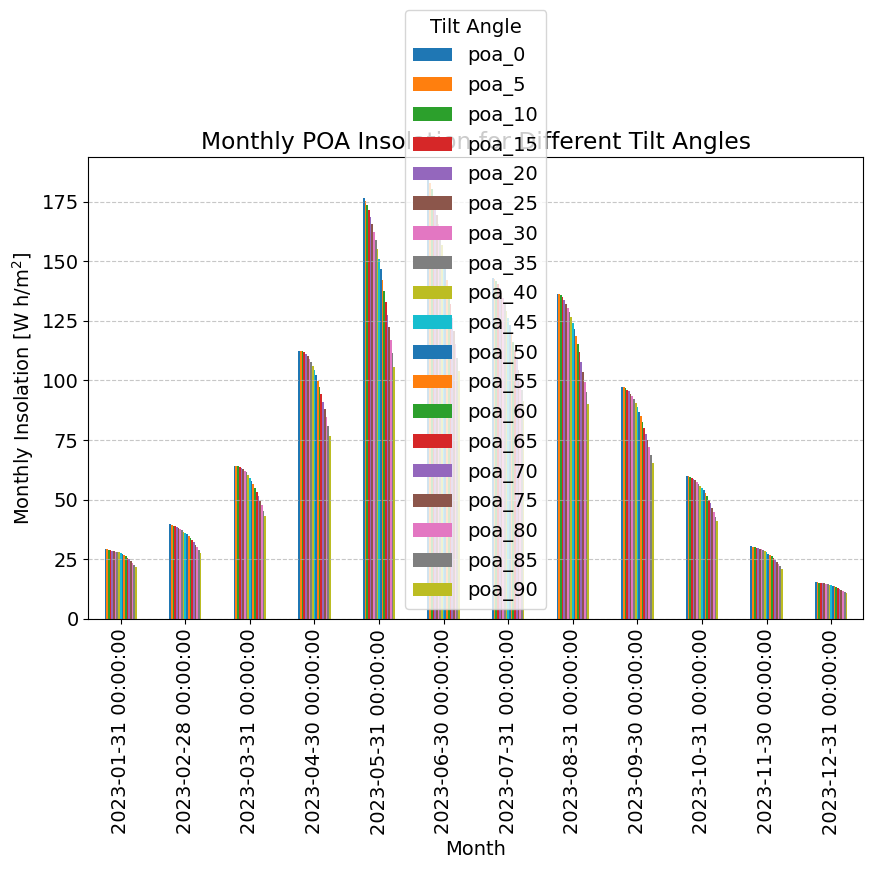

In [144]:
# Create a DataFrame with POA global values for all tilt angles in the dictionary
df_tilts = pd.DataFrame({f'poa_{tilt}': poas[tilt]['poa_global'] for tilt in poas})

# Resample the data to monthly sums
df_monthly = df_tilts.resample('ME').sum() / 1000 # Convert to kWh/m²

# Plot the monthly insolation as a bar chart
df_monthly.plot.bar(figsize=(10, 6))
plt.ylabel('Monthly Insolation [W h/m$^2$]')
plt.title('Monthly POA Insolation for Different Tilt Angles')
plt.xlabel('Month')
plt.legend(title='Tilt Angle')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [145]:
import plotly.express as px

# Calculate the annual total POA insolation for each tilt angle
annual_poa_totals = df_tilts.resample('YE').sum()

# Prepare the data for the scatter plot
scatter_data = annual_poa_totals.sum().reset_index()
scatter_data.columns = ['Tilt Angle', 'Annual POA Insolation']

# Create the scatter plot
fig = px.scatter(
    scatter_data,
    x='Tilt Angle',
    y='Annual POA Insolation',
    title='Annual Total POA Insolation for Different Tilt Angles',
    labels={'Tilt Angle': 'Tilt Angle (degrees)', 'Annual POA Insolation': 'Insolation (kWh/m²)'},
    template='plotly_dark'
)

# Customize the layout
fig.update_traces(marker=dict(size=10, color='orange', line=dict(width=2, color='black')))
fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=0, dtick=5),
    yaxis=dict(title='Annual POA Insolation (kWh/m²)'),
    height=500,
    width=800
)

# Show the plot
fig.show()

## Model Solar Panel Temperature


We already have the weather data providing the air temperature. However we need to know the temperature
of the solar panels themselves, as this is a critical input to determine the power production.

The temperature of the solar panels depends on many factors, and we will use an established model to estimate the temperature at each timepoint based on these factors:

- air temperature
- wind speed
- solar irradiance (DNI)
- the type of solar panel
- the panel's mounting configuration

In [146]:
all_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']
list(all_parameters.keys())

['open_rack_glass_glass',
 'close_mount_glass_glass',
 'open_rack_glass_polymer',
 'insulated_back_glass_polymer']

In [147]:
tilt = 25  # choose a tilt angle from tilts used above
parameters = all_parameters['open_rack_glass_glass']
display(parameters)
# note the "splat" operator "**" which expands the dictionary "parameters"
# into a comma separated list of keyword arguments
cell_temperature = pvlib.temperature.sapm_cell(
    df_tilts[f'poa_{tilt}'], df['Temperature'], df['Wind Speed'], **parameters)

{'a': -3.47, 'b': -0.0594, 'deltaT': 3}

Text(0, 0.5, 'Temperature [°C]')

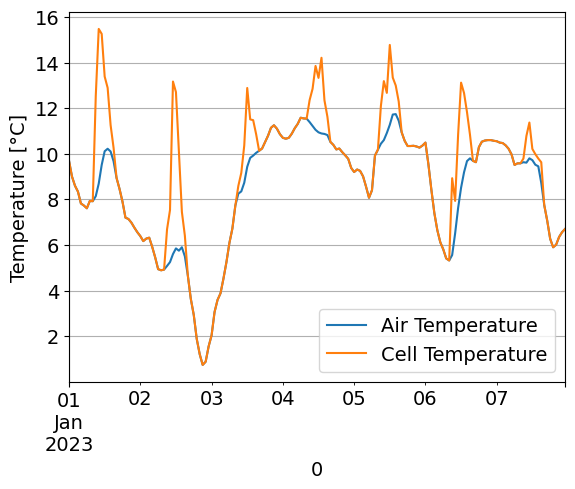

In [148]:
# Now we can plot the cell temperature against the ambient temperature

df['Temperature'].head(24*7).plot()
cell_temperature.head(24*7).plot()
plt.grid()
plt.legend(['Air Temperature', 'Cell Temperature'])
# # note Python 3 can use unicode characters like the degrees symbol
plt.ylabel('Temperature [°C]')

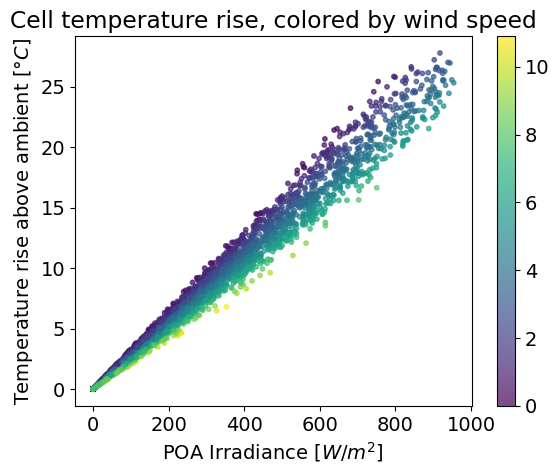

In [149]:
temperature_difference = cell_temperature - df['Temperature']
plt.scatter(poas[tilt]['poa_global'], temperature_difference, c=df['Wind Speed'], s=10, alpha=0.7)
plt.colorbar()
plt.ylabel(r"Temperature rise above ambient [$\degree C$]")
plt.xlabel('POA Irradiance [$W/m^2$]');
plt.title('Cell temperature rise, colored by wind speed');

## DC Power Generation Calculation

We will start by creating a PVWatts model to calculate the power generation.

In [150]:
# Assume a 1kW nameplate module with a 0.4% temperature coefficient
gamma_pdc = -0.4 / 100.0  # divide by 100 to go from %/°C to 1/°C
nameplate = 100_000 # Watts

array_power = pvlib.pvsystem.pvwatts_dc(poas[tilt]['poa_global'], cell_temperature, nameplate, gamma_pdc)
system_losses = pvlib.pvsystem.pvwatts_losses(soiling=2, 
                                              shading=3, 
                                              snow=0, 
                                              mismatch=2, 
                                              wiring=2, 
                                              connections=0.5, 
                                              lid=1.5, 
                                              nameplate_rating=1, 
                                              age=0,
                                              availability=3)
array_power_effective = array_power * (1 - system_losses / 100)




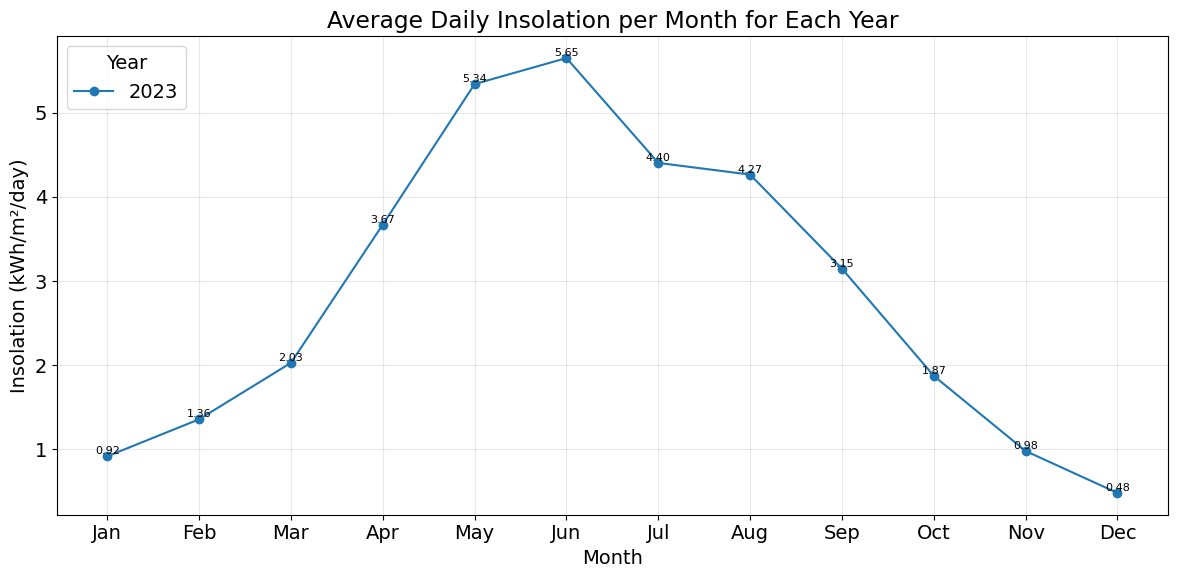

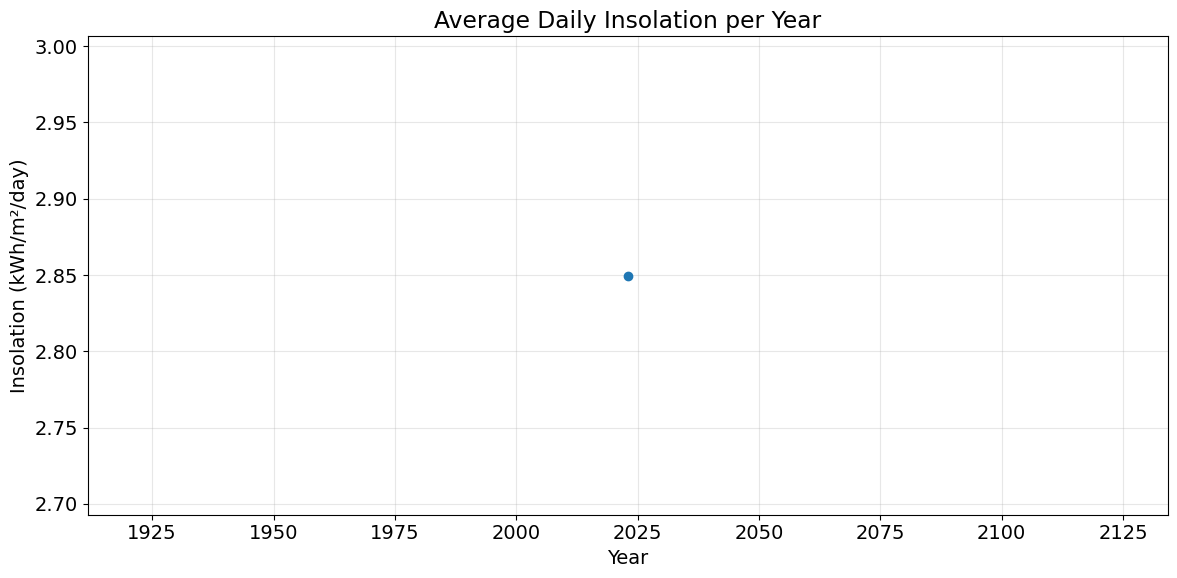

In [151]:
# Calculate daily insolation (kWh/m²) from hourly data
daily_insolation = poas[tilt]['poa_global'].resample('D').sum() / 1000  # Convert to kWh/m²

# Add year and month columns for grouping
daily_insolation_df = daily_insolation.to_frame(name='Daily Insolation')
daily_insolation_df['Year'] = daily_insolation_df.index.year
daily_insolation_df['Month'] = daily_insolation_df.index.month

# Group by year and month to calculate total insolation per day
monthly_daily_insolation = daily_insolation_df.groupby(['Year', 'Month'])['Daily Insolation'].mean().unstack(level=0)

# Plot total insolation per day for each year and month
plt.figure(figsize=(12, 6))
ax = monthly_daily_insolation.plot(ax=plt.gca(), marker='o')
for line in ax.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y, f'{y:.2f}', fontsize=8, ha='center', va='bottom')
plt.title('Average Daily Insolation per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Insolation (kWh/m²/day)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot total insolation per day for each year
plt.figure(figsize=(12, 6))
ax = daily_insolation_df.groupby('Year')['Daily Insolation'].mean().plot(marker='o')
plt.title('Average Daily Insolation per Year')
plt.xlabel('Year')
plt.ylabel('Insolation (kWh/m²/day)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Array Power [W]')

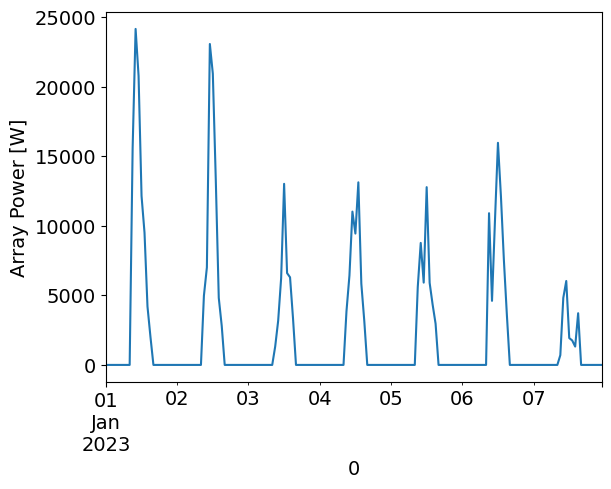

In [152]:
array_power_effective.head(24*7).plot()
plt.ylabel('Array Power [W]')

Text(0.5, 1.0, 'Power vs POA, colored by amb. temp.')

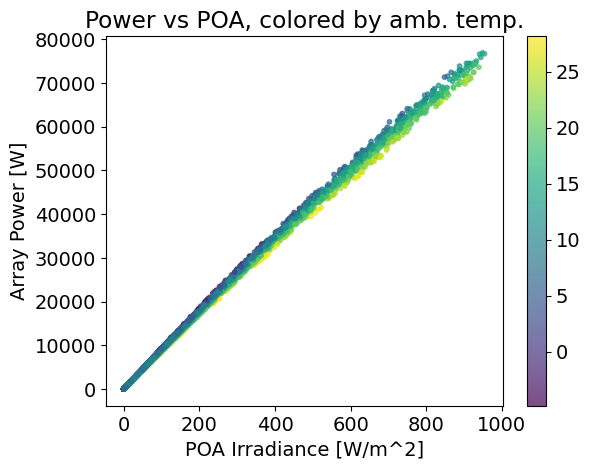

In [153]:
plt.scatter(poas[tilt]['poa_global'], array_power_effective, c=df['Temperature'], s=10, alpha=0.7)
plt.colorbar()
plt.ylabel('Array Power [W]')
plt.xlabel('POA Irradiance [W/m^2]')
plt.title('Power vs POA, colored by amb. temp.')

Text(0.5, 1.0, 'Power vs POA, colored by cell temp.')

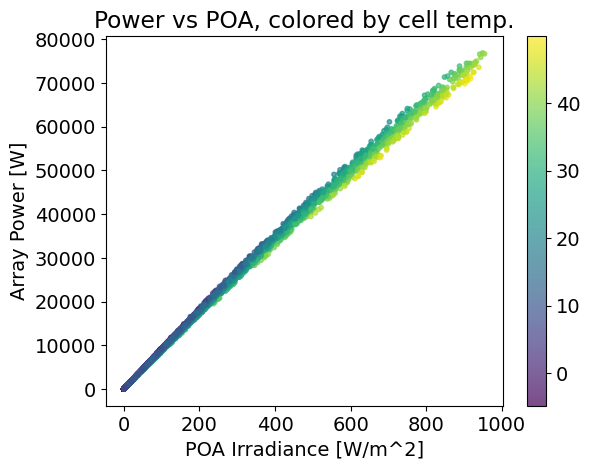

In [154]:
plt.scatter(poas[tilt]['poa_global'], array_power_effective, c=cell_temperature, s=10, alpha=0.7)
plt.colorbar()
plt.ylabel('Array Power [W]')
plt.xlabel('POA Irradiance [W/m^2]')
plt.title('Power vs POA, colored by cell temp.')

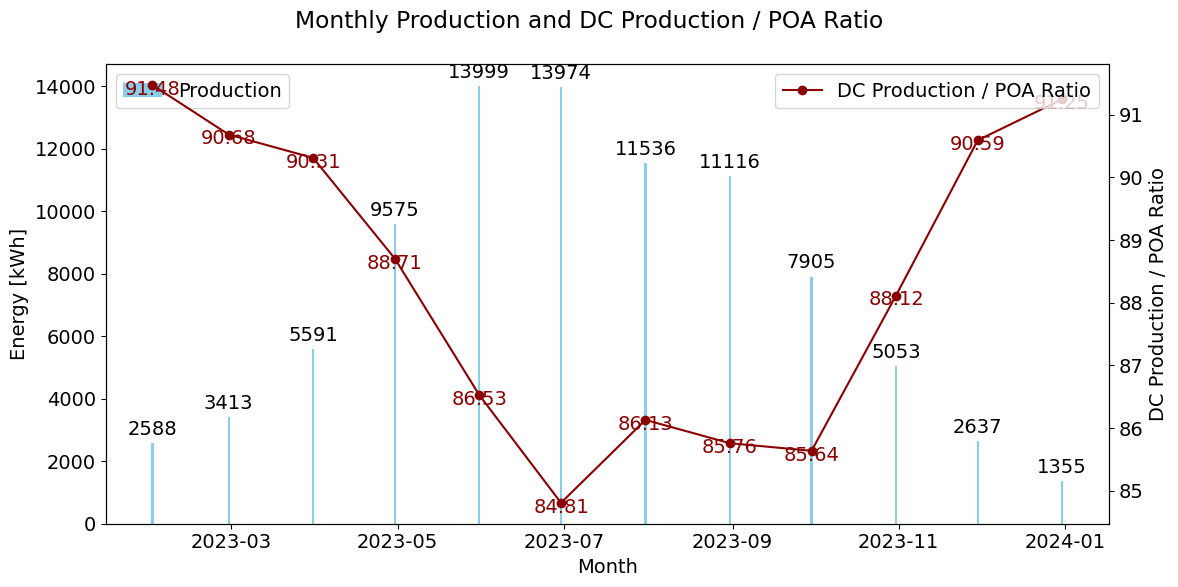

,Monthly DC Production (kWh)
0,
2023-01-31 00:00:00,2588.110444
2023-02-28 00:00:00,3413.162453
2023-03-31 00:00:00,5591.230439
2023-04-30 00:00:00,9575.296888
2023-05-31 00:00:00,13999.366804
2023-06-30 00:00:00,13973.708365
2023-07-31 00:00:00,11535.884401
2023-08-31 00:00:00,11116.118091
2023-09-30 00:00:00,7904.831729


In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Your original dataframe construction
df_plot = pd.DataFrame({
    'POA': poas[tilt]['poa_global'],
    'Production': array_power_effective,
    'DC Production / POA Ratio': array_power_effective / poas[tilt]['poa_global'],
})

# Summing hourly power (W) gives (W h), so divide by 1000 to get kWh
df_plot['Production'] /= 1000
df_plot['POA'] /= 1000

# Resample monthly
df_plot_resampled = df_plot.resample('ME').sum()
df_plot_resampled['DC Production / POA Ratio'] = df_plot['DC Production / POA Ratio'].resample('ME').mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot for Production
bars = ax1.bar(df_plot_resampled.index, df_plot_resampled['Production'], color='skyblue', label='Production')
ax1.set_ylabel('Energy [kWh]')
ax1.set_xlabel('Month')

# Add data labels for Production
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.0f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Line plot for Ratio
ax2 = ax1.twinx()
ax2.plot(df_plot_resampled.index, df_plot_resampled['DC Production / POA Ratio'], color='darkred', marker='o', label='DC Production / POA Ratio')
ax2.set_ylabel('DC Production / POA Ratio')

# Add data labels for Ratio
for i, v in enumerate(df_plot_resampled['DC Production / POA Ratio']):
    ax2.annotate(f'{v:.2f}', 
                 xy=(df_plot_resampled.index[i], v),
                 xytext=(0, -10), 
                 textcoords="offset points",
                 ha='center', va='bottom', color='darkred')

# Titles and Legends
fig.suptitle('Monthly Production and DC Production / POA Ratio')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Monthly and Annual Summary
monthly_production = df_plot['Production'].resample('ME').sum()
annual_total = monthly_production.sum()
df_summary = pd.DataFrame({
    'Monthly DC Production (kWh)': monthly_production
})
df_summary.loc['Annual Total'] = df_summary['Monthly DC Production (kWh)'].sum()
display(df_summary)


49583.333333333336


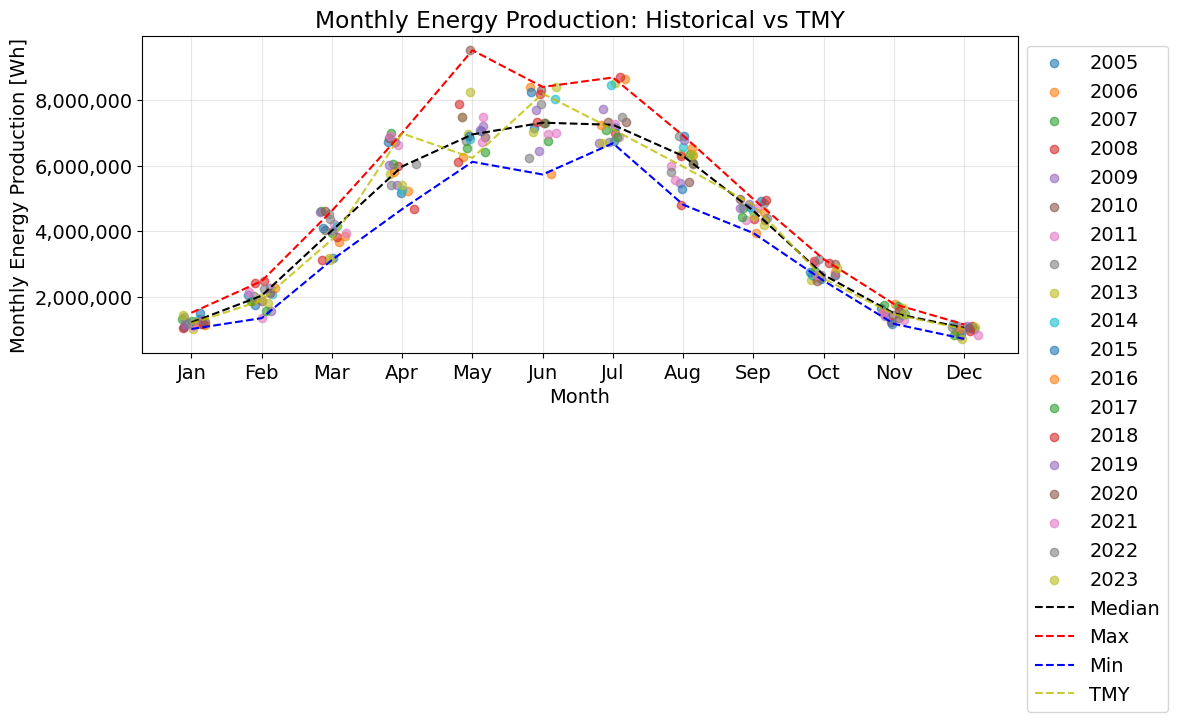

0
2005-12-31    49.124269
2006-12-31    51.588786
2007-12-31    51.671163
2008-12-31    48.428268
2009-12-31    49.980547
2010-12-31    51.383181
2011-12-31    50.623975
2012-12-31    48.985299
2013-12-31    50.140695
2014-12-31    52.656703
2015-12-31    51.781557
2016-12-31    49.494009
2017-12-31    49.538276
2018-12-31    53.097262
2019-12-31    51.548942
2020-12-31    55.034784
2021-12-31    50.397427
2022-12-31    53.806700
2023-12-31    51.188215
Freq: YE-DEC, Name: AC Production, dtype: float64

count    19.000000
mean     51.077371
std       1.731346
min      48.428268
25%      49.759411
50%      51.188215
75%      51.726360
max      55.034784
Name: AC Production, dtype: float64

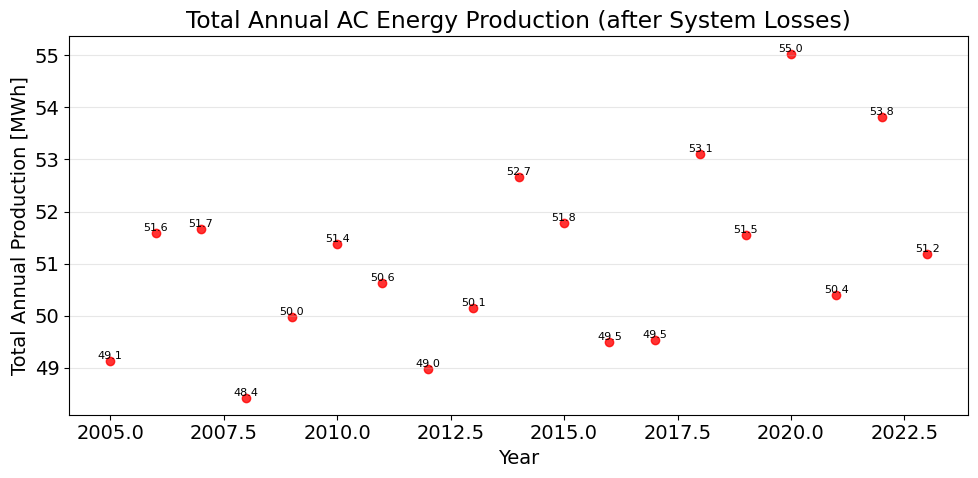

In [156]:
def plot_monthly_energy_production_with_orientation(df_historical, df_tmy, tilt_angle=25, kWp=100):
    """
    Plots the monthly energy production for all years in df_historical and the TMY as a separate data series.
    Includes POA and temperature analysis, and considers 50% of panels oriented at 90° and 50% at 270°.

    Parameters:
    - df_historical: DataFrame containing historical data with a datetime index.
    - df_tmy: DataFrame containing TMY data with a datetime index.
    - tilt_angle: Tilt angle of the panels (default is 15°).
    - column: The column to use for energy production (default is 'GHI').
    """
    # Ensure datetime index is timezone-naive
    df_historical.index = df_historical.index.tz_localize(None)
    df_tmy.index = df_tmy.index.tz_localize(None)

    # Calculate solar position
    location = pvlib.location.Location(latitude=51.483, longitude=-1.718)
    solar_position = location.get_solarposition(df_historical.index)

    # Calculate POA irradiance for both orientations (90° and 270° azimuth)
    poa_90 = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt_angle,
        surface_azimuth=90,
        dni=df_historical['DNI'],
        ghi=df_historical['GHI'],
        dhi=df_historical['DHI'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'],
        model='isotropic'
    )['poa_global']

    poa_270 = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt_angle,
        surface_azimuth=270,
        dni=df_historical['DNI'],
        ghi=df_historical['GHI'],
        dhi=df_historical['DHI'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'],
        model='isotropic'
    )['poa_global']

    # Average the POA irradiance for both orientations
    df_historical['POA'] = (poa_90 + poa_270) / 2

    # Calculate cell temperature
    parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
    df_historical['Cell Temperature'] = pvlib.temperature.sapm_cell(
        df_historical['POA'], df_historical['Temperature'], df_historical['Wind Speed'], **parameters
    )

    # Determine System Losses (Default Assumption = c. 14%)
    system_losses = pvlib.pvsystem.pvwatts_losses(soiling=2, 
                                              shading=3, 
                                              snow=0, 
                                              mismatch=2, 
                                              wiring=2, 
                                              connections=0.5, 
                                              lid=1.5, 
                                              nameplate_rating=1, 
                                              age=0,
                                              availability=3)
    

    # Calculate monthly DC energy production (after system losses)
    gamma_pdc = -0.004  # Temperature coefficient
    nameplate_capacity = kWp * 1000.0 # 1 kW system
    df_historical['DC Production'] = pvlib.pvsystem.pvwatts_dc(
        df_historical['POA'], df_historical['Cell Temperature'], nameplate_capacity, gamma_pdc
    ) * (1 - system_losses / 100)

    # Calculate monthly AC energy production (after inverter losses)
    DC_rated_power = kWp * 1000 # Watts
    AC_DC = 1.25 # inverter derating factor
    inverter_efficiency = 0.96
    AC_rated_power = DC_rated_power / AC_DC # Watts
    pdc0 = AC_rated_power/inverter_efficiency #pdc0 is the DC limit of the inverter
    print(pdc0)

    df_historical['AC Production'] = pvlib.inverter.pvwatts(df_historical['DC Production'], pdc0)

    # Resample historical data to monthly sums
    monthly_historical = df_historical['AC Production'].resample('ME').sum()
    monthly_historical = monthly_historical.to_frame(name='Energy')
    monthly_historical['Year'] = monthly_historical.index.year
    monthly_historical['Month'] = monthly_historical.index.month

    # Resample TMY data to monthly sums
    poa_tmy = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt_angle,
        surface_azimuth=90,  # Assuming TMY uses a single orientation
        dni=df_tmy['DNI'],
        ghi=df_tmy['GHI'],
        dhi=df_tmy['DHI'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'],
        model='isotropic'
    )

    df_tmy['POA'] = poa_tmy['poa_global']

    df_tmy['Cell Temperature'] = pvlib.temperature.sapm_cell(
        df_tmy['POA'], df_tmy['Temperature'], df_tmy['Wind Speed'], **parameters
    )
    df_tmy['DC Production'] = pvlib.pvsystem.pvwatts_dc(
        df_tmy['POA'], df_tmy['Cell Temperature'], nameplate_capacity, gamma_pdc
    ) * (1 - system_losses / 100)

    df_tmy['AC Production'] = pvlib.inverter.pvwatts(df_tmy['DC Production'], pdc0)


    df_tmy_yr = df_tmy.copy()
    df_tmy_yr.index = df_tmy_yr.index.map(lambda x: x.replace(year=2024))
    monthly_tmy = df_tmy_yr['AC Production'].resample('ME').sum()
    monthly_tmy.index = monthly_tmy.index.month  # Use month as the index for TMY
    monthly_tmy.name = 'TMY'

    # Calculate median, max, and min for each month in historical data
    monthly_stats = monthly_historical.groupby('Month')['Energy'].agg(['median', 'max', 'min'])

    # Plotting
    plt.figure(figsize=(12, 6))
    # Set the formatter for the y-axis to display full numbers
    plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))


    # Scatter plot for historical data
    for year, group in monthly_historical.groupby('Year'):
        jitter = np.random.uniform(-0.2, 0.2, size=len(group))  # Add jitter for better visualization
        plt.scatter(group['Month'] + jitter, group['Energy'], label=f'{year}', alpha=0.6)

    # Plot median, max, and min lines
    plt.plot(monthly_stats.index, monthly_stats['median'], 'k--', label='Median')
    plt.plot(monthly_stats.index, monthly_stats['max'], 'r--', label='Max')
    plt.plot(monthly_stats.index, monthly_stats['min'], 'b--', label='Min')

    # Plot TMY as a scatter plot with a partly transparent line
    plt.plot(monthly_tmy.index, monthly_tmy.values, 'y--', label='TMY', alpha=0.8, linewidth=1.5)

    # Add labels, legend, and grid
    plt.xlabel('Month')
    plt.ylabel('Monthly Energy Production [Wh]')
    plt.title('Monthly Energy Production: Historical vs TMY')
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# Plot monthly energy production with orientation
plot_monthly_energy_production_with_orientation(df_historical, df_tmy, tilt_angle=20, kWp=59.5)

# Calculate total annual production for each year in historical data
annual_historical_mwh = df_historical['AC Production'].resample('YE').sum() / 1000000
display(annual_historical_mwh)
display(annual_historical_mwh.describe())

# Plot total annual production
plt.figure(figsize=(10, 5))
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
dots = plt.scatter(annual_historical_mwh.index.year, annual_historical_mwh.values, color='red', alpha=0.8)

# Add data labels on each point
for i, value in enumerate(annual_historical_mwh.values):
    plt.text(
        annual_historical_mwh.index.year[i],
        value,
        f'{value:.1f}',
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.xlabel('Year')
plt.ylabel('Total Annual Production [MWh]')
plt.title('Total Annual AC Energy Production (after System Losses)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## AC/DC Conversion

In [157]:
# We now need to get the AC power output from the inverter

DC_rated_power = 100_000
AC_DC = 1.25 # inverter derating factor
inverter_efficiency = 0.96
AC_rated_power = DC_rated_power / AC_DC # Watts
pdc0 = AC_rated_power/inverter_efficiency #pdc0 is the DC limit of the inverter
print(pdc0)

83333.33333333334


In [158]:
ac = pvlib.inverter.pvwatts(array_power, pdc0)

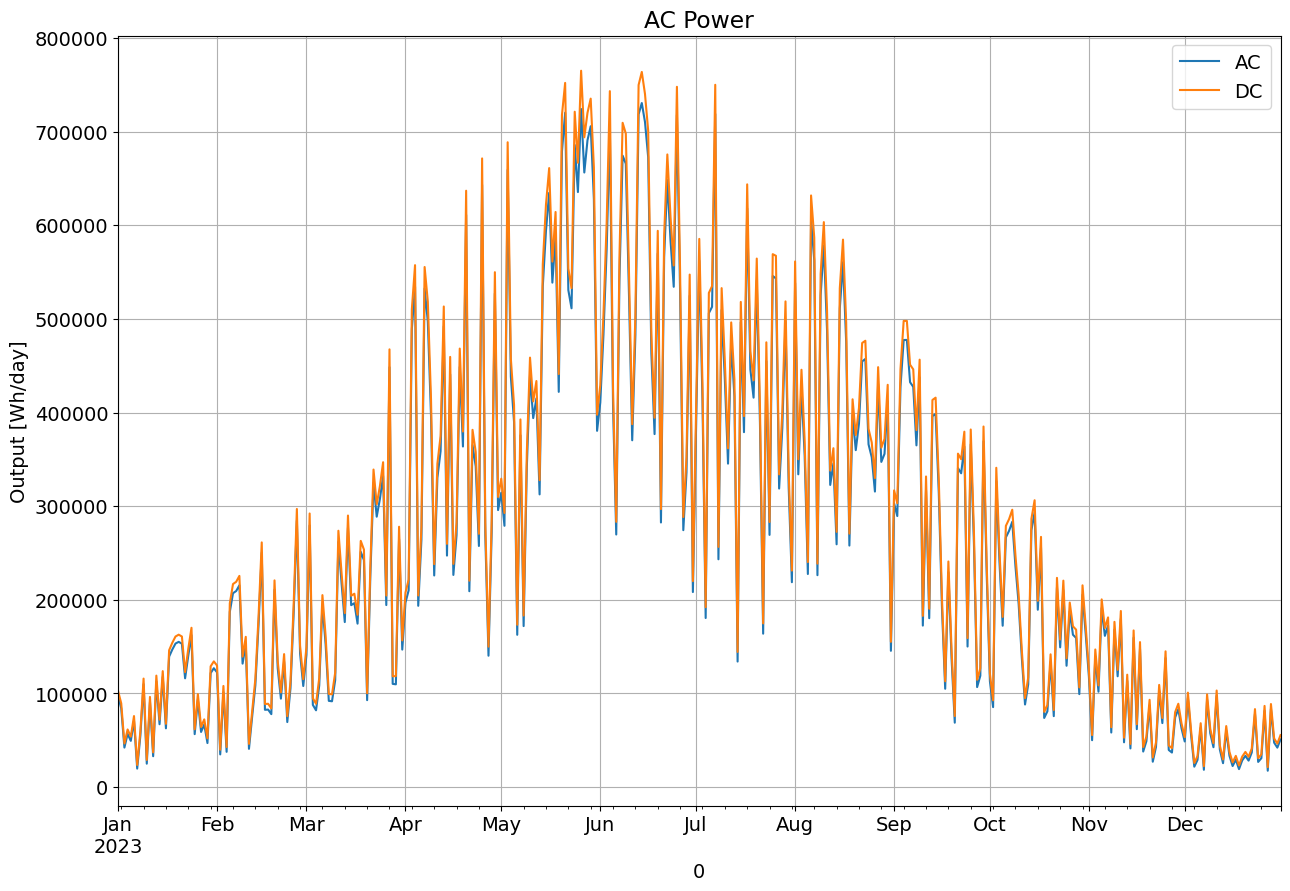

In [159]:
plt.rcParams['font.size'] = 14
ax = ac.resample('D').sum().plot(figsize=(15, 10), label='AC')
array_power.resample('D').sum().plot(ax=ax, label='DC')
plt.title('AC Power')
plt.ylabel('Output [Wh/day]')
plt.grid()
plt.legend()

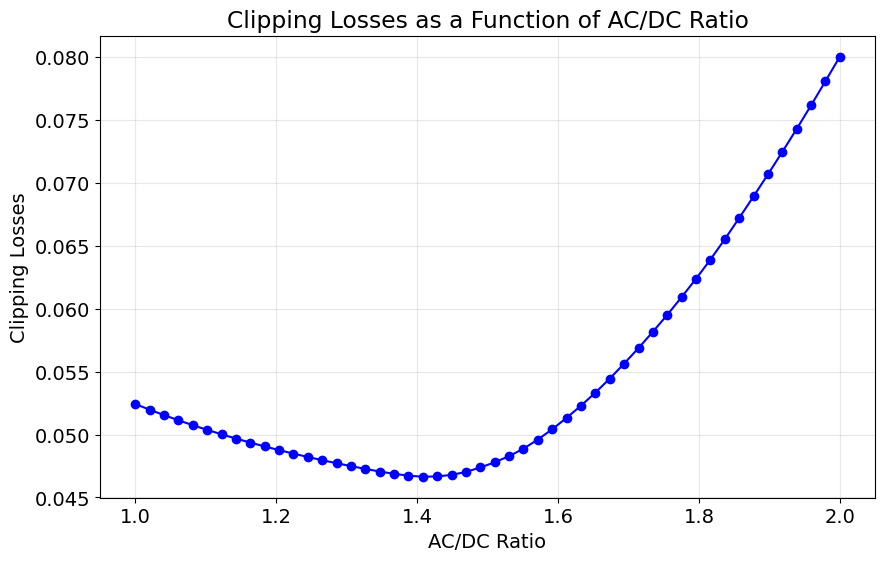

In [160]:
# Define a range of AC_DC ratios to test

ac_dc_ratios = np.linspace(1.0, 2.0, 50)  # From 1.0 to 2.0 with 50 steps
clipping_losses = []

# Loop through each AC_DC ratio and calculate clipping losses
for ac_dc in ac_dc_ratios:
    ac_rated_power = DC_rated_power / ac_dc
    pdc0 = ac_rated_power / inverter_efficiency
    ac_power = pvlib.inverter.pvwatts(array_power_effective, pdc0)
    loss = (array_power_effective.sum() - ac_power.sum()) / array_power_effective.sum()
    clipping_losses.append(loss)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ac_dc_ratios, clipping_losses, marker='o', linestyle='-', color='b')
plt.xlabel('AC/DC Ratio')
plt.ylabel('Clipping Losses')
plt.title('Clipping Losses as a Function of AC/DC Ratio')
plt.grid(alpha=0.3)
plt.show()

## Complete Monthly AC Production Analysis

In [161]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import pvlib

def plot_monthly_energy_production_with_orientation(df_historical, df_tmy, tilt_angle=15, kWp=100):
    # Ensure datetime index is timezone-naive
    df_historical.index = df_historical.index.tz_localize(None)
    df_tmy.index = df_tmy.index.tz_localize(None)

    # Calculate solar position
    location = pvlib.location.Location(latitude=51.483, longitude=-1.718)
    solar_position = location.get_solarposition(df_historical.index)

    # Calculate POA irradiance for both 90° and 270° azimuths
    def get_poa(azimuth):
        return pvlib.irradiance.get_total_irradiance(
            surface_tilt=tilt_angle,
            surface_azimuth=azimuth,
            dni=df_historical['DNI'],
            ghi=df_historical['GHI'],
            dhi=df_historical['DHI'],
            solar_zenith=solar_position['apparent_zenith'],
            solar_azimuth=solar_position['azimuth'],
            model='isotropic'
        )['poa_global']

    df_historical['POA'] = (get_poa(90) + get_poa(270)) / 2

    # Cell temperature and losses
    params = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
    df_historical['Cell Temperature'] = pvlib.temperature.sapm_cell(
        df_historical['POA'], df_historical['Temperature'], df_historical['Wind Speed'], **params
    )

    system_losses = pvlib.pvsystem.pvwatts_losses(
        soiling=2, shading=3, mismatch=2, wiring=2, connections=0.5, lid=1.5, availability=3
    )

    gamma_pdc = -0.004
    nameplate_capacity = kWp * 1000
    df_historical['DC Production'] = pvlib.pvsystem.pvwatts_dc(
        df_historical['POA'], df_historical['Cell Temperature'], nameplate_capacity, gamma_pdc
    ) * (1 - system_losses / 100)

    AC_DC = 1.25
    inverter_efficiency = 0.96
    AC_rated_power = nameplate_capacity / AC_DC
    pdc0 = AC_rated_power / inverter_efficiency

    df_historical['AC Production'] = pvlib.inverter.pvwatts(df_historical['DC Production'], pdc0)

    # Monthly aggregation
    monthly_hist = df_historical['AC Production'].resample('ME').sum()
    monthly_hist_df = pd.DataFrame({
        'Energy': monthly_hist,
        'Year': monthly_hist.index.year,
        'Month': monthly_hist.index.month
    })

    # TMY Calculations
    solar_position_tmy = location.get_solarposition(df_tmy.index)
    df_tmy['POA'] = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt_angle,
        surface_azimuth=90,
        dni=df_tmy['DNI'],
        ghi=df_tmy['GHI'],
        dhi=df_tmy['DHI'],
        solar_zenith=solar_position_tmy['apparent_zenith'],
        solar_azimuth=solar_position_tmy['azimuth'],
        model='isotropic'
    )['poa_global']

    df_tmy['Cell Temperature'] = pvlib.temperature.sapm_cell(
        df_tmy['POA'], df_tmy['Temperature'], df_tmy['Wind Speed'], **params
    )
    df_tmy['DC Production'] = pvlib.pvsystem.pvwatts_dc(
        df_tmy['POA'], df_tmy['Cell Temperature'], nameplate_capacity, gamma_pdc
    ) * (1 - system_losses / 100)

    df_tmy['AC Production'] = pvlib.inverter.pvwatts(df_tmy['DC Production'], pdc0)
    df_tmy.index = df_tmy.index.map(lambda dt: dt.replace(year=2024))
    monthly_tmy = df_tmy['AC Production'].resample('ME').sum()
    monthly_tmy.index = monthly_tmy.index.month

    # Historical stats
    stats = monthly_hist_df.groupby('Month')['Energy'].agg(['median', 'min', 'max'])

    # Create plotly figure
    fig = go.Figure()

    # Plot historical energy per year with jitter
    for year, group in monthly_hist_df.groupby('Year'):
        jitter = np.random.uniform(-0.2, 0.2, size=len(group))
        fig.add_trace(go.Scatter(
            x=group['Month'] + jitter,
            y=group['Energy'],
            mode='markers',
            name=str(year),
            opacity=0.6,
            marker=dict(size=6)
        ))

    # Plot stats
    fig.add_trace(go.Scatter(x=stats.index, y=stats['median'], mode='lines', name='Median', line=dict(dash='dash')))
    fig.add_trace(go.Scatter(x=stats.index, y=stats['max'], mode='lines', name='Max', line=dict(dash='dot', color='red')))
    fig.add_trace(go.Scatter(x=stats.index, y=stats['min'], mode='lines', name='Min', line=dict(dash='dot', color='blue')))

    # Plot TMY
    fig.add_trace(go.Scatter(x=monthly_tmy.index, y=monthly_tmy.values, mode='lines+markers', name='TMY', line=dict(color='orange', width=2)))

    fig.update_layout(
        title='Monthly Energy Production: Historical vs TMY',
        xaxis=dict(title='Month', tickmode='array', tickvals=list(range(1, 13)),
                   ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']),
        yaxis=dict(title='Monthly Energy Production [Wh]', tickformat=','),
        legend=dict(orientation='v', yanchor='top', y=1.02, xanchor='left', x=1),
        height=500,
        margin=dict(l=40, r=20, t=50, b=40),
        template='plotly_dark'
    )

    fig.show()

    # Total annual production chart
    annual_hist = df_historical['AC Production'].resample('Y').sum() / 1e6
    fig_annual = px.scatter(
        x=annual_hist.index.year,
        y=annual_hist.values,
        text=[f"{v:.1f}" for v in annual_hist.values],
        labels={'x': 'Year', 'y': 'Total Annual Production [MWh]'},
        title='Total Annual AC Energy Production (after System Losses)'
    )
    fig_annual.update_traces(marker=dict(size=10, color='firebrick'), textposition='top center')
    fig_annual.update_layout(
        yaxis_tickformat=',',
        template='plotly_dark',
        height=400
    )
    fig_annual.show()

    return annual_hist.describe()

plot_monthly_energy_production_with_orientation(df_historical, df_tmy, tilt_angle=22, kWp=252)

/var/folders/_m/h8l9pxn15fdf17mc1s6m6cxh0000gn/T/ipykernel_18355/855688791.py:128: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



count     19.000000
mean     215.389764
std        7.291414
min      204.234538
25%      209.818086
50%      215.830630
75%      218.151067
max      232.036132
Name: AC Production, dtype: float64

## Analyse Losses from POA to AC Production

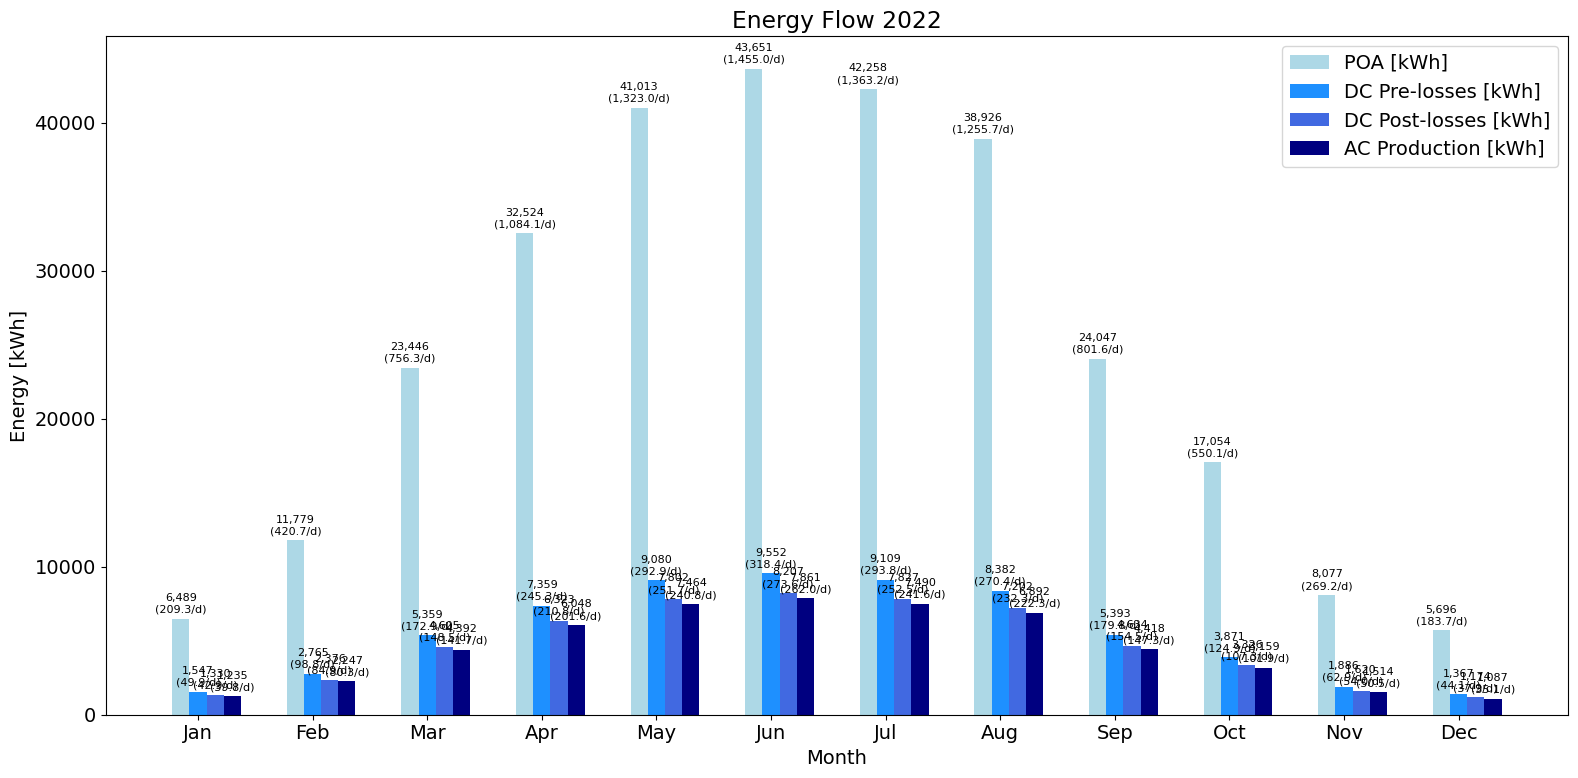

,Annual Total (kWh),Loss,Loss %,Cumulative Loss,Cumulative Loss %
POA (kWh),"294,961",0,nan%,0,0.0%
DC Pre-losses (kWh),"65,670","-229,291",-77.7%,"-229,291",-77.7%
DC Post-losses (kWh),"56,427","-9,244",-14.1%,"-238,535",-80.9%
AC Production (kWh),"53,807","-2,620",-4.6%,"-241,155",-81.8%


In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pvlib

def plot_energy_flow(df_historical, df_tmy, year='TMY', tilt_angle=25, kWp=100):
    """
    Plot energy flow from GHI to AC Production for a given year or TMY.
    """
    # Ensure timezone-naive
    df_historical.index = df_historical.index.tz_localize(None)
    df_tmy.index = df_tmy.index.tz_localize(None)

    # Solar position
    location = pvlib.location.Location(latitude=51.483, longitude=-1.718)
    solar_position_hist = location.get_solarposition(df_historical.index)
    solar_position_tmy = location.get_solarposition(df_tmy.index)

    # Calculate POA for both orientations (historical)
    poa_90_hist = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt_angle, surface_azimuth=90,
        dni=df_historical['DNI'], ghi=df_historical['GHI'], dhi=df_historical['DHI'],
        solar_zenith=solar_position_hist['apparent_zenith'],
        solar_azimuth=solar_position_hist['azimuth'], model='isotropic'
    )['poa_global']

    poa_270_hist = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt_angle, surface_azimuth=270,
        dni=df_historical['DNI'], ghi=df_historical['GHI'], dhi=df_historical['DHI'],
        solar_zenith=solar_position_hist['apparent_zenith'],
        solar_azimuth=solar_position_hist['azimuth'], model='isotropic'
    )['poa_global']

    df_historical['POA'] = (poa_90_hist + poa_270_hist) / 2

    # Panel Area / kWP
    area_per_kWp = 2.333 * 1.134 / 0.595  # m^2 / kWp
    df_historical['POA * m^2'] = df_historical['POA'] * kWp * area_per_kWp

    # TMY POA
    poa_tmy = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt_angle, surface_azimuth=90,
        dni=df_tmy['DNI'], ghi=df_tmy['GHI'], dhi=df_tmy['DHI'],
        solar_zenith=solar_position_tmy['apparent_zenith'],
        solar_azimuth=solar_position_tmy['azimuth'], model='isotropic'
    )['poa_global']
    df_tmy['POA'] = poa_tmy

    # Cell temperature
    parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
    df_historical['Cell Temperature'] = pvlib.temperature.sapm_cell(df_historical['POA'], df_historical['Temperature'], df_historical['Wind Speed'], **parameters)
    df_tmy['Cell Temperature'] = pvlib.temperature.sapm_cell(df_tmy['POA'], df_tmy['Temperature'], df_tmy['Wind Speed'], **parameters)

    # DC production (before losses)
    gamma_pdc = -0.004
    nameplate_capacity = kWp * 1000  # W

    df_historical['DC Pre-losses'] = pvlib.pvsystem.pvwatts_dc(
        df_historical['POA'], df_historical['Cell Temperature'], nameplate_capacity, gamma_pdc
    )
    df_tmy['DC Pre-losses'] = pvlib.pvsystem.pvwatts_dc(
        df_tmy['POA'], df_tmy['Cell Temperature'], nameplate_capacity, gamma_pdc
    )

    # Apply system losses
    system_losses = pvlib.pvsystem.pvwatts_losses(
        soiling=2, shading=3, snow=0, mismatch=2, wiring=2,
        connections=0.5, lid=1.5, nameplate_rating=1, age=0, availability=3
    )
    df_historical['DC Post-losses'] = df_historical['DC Pre-losses'] * (1 - system_losses / 100)
    df_tmy['DC Post-losses'] = df_tmy['DC Pre-losses'] * (1 - system_losses / 100)

    # AC production
    inverter_efficiency = 0.96
    AC_DC = 1.25
    pdc0 = (kWp * 1000) / AC_DC / inverter_efficiency

    df_historical['AC Production'] = pvlib.inverter.pvwatts(df_historical['DC Post-losses'], pdc0)
    df_tmy['AC Production'] = pvlib.inverter.pvwatts(df_tmy['DC Post-losses'], pdc0)

    # Select dataset
    if year == 'TMY':
        df_selected = df_tmy.copy()
        df_selected.index = df_selected.index.map(lambda x: x.replace(year=2024))
    else:
        df_selected = df_historical[df_historical.index.year == year].copy()

    # Resample monthly
    df_monthly = df_selected.resample('ME').sum()
    df_monthly['Days'] = df_selected.resample('ME').count()['GHI'] / 24  # Count of full days

    # Prepare plotting
    fig, ax = plt.subplots(figsize=(16,8))

    months = df_monthly.index.strftime('%b')
    x = np.arange(len(months))
    width = 0.15

    bars1 = ax.bar(x - width, df_monthly['POA * m^2']/1000, width, label='POA [kWh]', color='lightblue')
    bars2 = ax.bar(x, df_monthly['DC Pre-losses']/1000, width, label='DC Pre-losses [kWh]', color='dodgerblue')
    bars3 = ax.bar(x + width, df_monthly['DC Post-losses']/1000, width, label='DC Post-losses [kWh]', color='royalblue')
    bars4 = ax.bar(x + 2*width, df_monthly['AC Production']/1000, width, label='AC Production [kWh]', color='navy')

    # Annotate bars with commas
    for bars, col in zip([bars1, bars2, bars3, bars4], ['POA * m^2', 'DC Pre-losses', 'DC Post-losses', 'AC Production']):
        for bar, days in zip(bars, df_monthly['Days']):
            height = bar.get_height()
            daily_avg = height / days
            ax.annotate(f'{height:,.0f}\n({daily_avg:,.1f}/d)', xy=(bar.get_x() + bar.get_width()/2, height),
                        xytext=(0,3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

    ax.set_ylabel('Energy [kWh]')
    ax.set_xlabel('Month')
    ax.set_xticks(x)
    ax.set_xticklabels(months)
    ax.legend()
    ax.set_title(f'Energy Flow {year}')

    plt.tight_layout()
    plt.show()

    # Annual totals table
    totals = {
        'POA (kWh)': df_monthly['POA * m^2'].sum() / 1000,
        'DC Pre-losses (kWh)': df_monthly['DC Pre-losses'].sum() / 1000,
        'DC Post-losses (kWh)': df_monthly['DC Post-losses'].sum() / 1000,
        'AC Production (kWh)': df_monthly['AC Production'].sum() / 1000
    }
    df_totals = pd.DataFrame.from_dict(totals, orient='index', columns=['Annual Total (kWh)'])
    df_totals['Loss'] = df_totals['Annual Total (kWh)'].diff().fillna(0)
    df_totals['Loss %'] = df_totals['Loss'] / df_totals['Annual Total (kWh)'].shift(1).fillna(0) * 100
    df_totals['Cumulative Loss'] = df_totals['Loss'].cumsum()
    df_totals['Cumulative Loss %'] = df_totals['Cumulative Loss'] / df_totals['Annual Total (kWh)'].iloc[0] * 100

    # Format the table properly
    df_totals_formatted = df_totals.copy()

    for col in ['Annual Total (kWh)', 'Loss', 'Cumulative Loss']:
        df_totals_formatted[col] = df_totals_formatted[col].map(lambda x: f"{x:,.0f}")

    for col in ['Loss %', 'Cumulative Loss %']:
        df_totals_formatted[col] = df_totals_formatted[col].map(lambda x: f"{x:.1f}%")

    display(df_totals_formatted)

# Usage
plot_energy_flow(df_historical, df_tmy, year=2022, tilt_angle=20, kWp=59.5)


In [183]:
import plotly.graph_objects as go

def plot_daily_ac_production_histogram(df_historical, start_year, end_year, month, tilt_angle=25, kWp=100):
    """
    Create a histogram of daily AC Production for a given month across multiple years.
    """
    # Step 1: Prepare the historical dataframe (timezone-naive)
    df_historical.index = df_historical.index.tz_localize(None)

    # Solar position
    location = pvlib.location.Location(latitude=51.483, longitude=-1.718)
    solar_position = location.get_solarposition(df_historical.index)

    # Calculate POA
    poa_90 = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt_angle, surface_azimuth=90,
        dni=df_historical['DNI'], ghi=df_historical['GHI'], dhi=df_historical['DHI'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'], model='isotropic'
    )['poa_global']

    poa_270 = pvlib.irradiance.get_total_irradiance(
        surface_tilt=tilt_angle, surface_azimuth=270,
        dni=df_historical['DNI'], ghi=df_historical['GHI'], dhi=df_historical['DHI'],
        solar_zenith=solar_position['apparent_zenith'],
        solar_azimuth=solar_position['azimuth'], model='isotropic'
    )['poa_global']

    df_historical['POA'] = (poa_90 + poa_270) / 2

    # Cell temperature
    parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
    df_historical['Cell Temperature'] = pvlib.temperature.sapm_cell(
        df_historical['POA'], df_historical['Temperature'], df_historical['Wind Speed'], **parameters
    )

    # DC production
    gamma_pdc = -0.004
    nameplate_capacity = kWp * 1000  # W

    df_historical['DC Pre-losses'] = pvlib.pvsystem.pvwatts_dc(
        df_historical['POA'], df_historical['Cell Temperature'], nameplate_capacity, gamma_pdc
    )

    # Apply system losses
    system_losses = pvlib.pvsystem.pvwatts_losses(
        soiling=2, shading=3, snow=0, mismatch=2, wiring=2,
        connections=0.5, lid=1.5, nameplate_rating=1, age=0, availability=3
    )
    df_historical['DC Post-losses'] = df_historical['DC Pre-losses'] * (1 - system_losses / 100)

    # AC production
    inverter_efficiency = 0.96
    AC_DC = 1.25
    pdc0 = (kWp * 1000) / AC_DC / inverter_efficiency

    df_historical['AC Production'] = pvlib.inverter.pvwatts(df_historical['DC Post-losses'], pdc0)

    df_daily = df_historical['AC Production'].resample('D').sum() / 1000  # Convert to kWh

    # Step 2: Filter data for the selected years and month
    df_filtered = df_daily[
        (df_daily.index.year >= start_year) &
        (df_daily.index.year <= end_year) &
        (df_daily.index.month == month)
    ]

    # Resample to daily total AC Production (sum over each day)
    df_daily = df_filtered

    display(df_daily.sort_values(ascending=False).tail(10))  # Display top 10 daily productions

    # Step 3: Calculate mean and median
    mean_daily = df_daily.mean()
    median_daily = df_daily.median()

    # Step 4: Plot using Plotly
    fig = go.Figure()

    fig.add_trace(go.Histogram(
        x=df_daily,
        nbinsx=20,
        marker_color='dodgerblue',
        name='Daily AC Production'
    ))

    # Add vertical lines for mean and median
    fig.add_vline(x=mean_daily, line_width=2, line_dash="dash", line_color="green",
                  annotation_text=f"Mean: {mean_daily:.1f} kWh", annotation_position="top")
    fig.add_vline(x=median_daily, line_width=2, line_dash="dot", line_color="orange",
                  annotation_text=f"Median: {median_daily:.1f} kWh", annotation_position="top left")

    fig.update_layout(
        title=f"Daily AC Production Histogram ({start_year}-{end_year}), Month: {month}",
        xaxis_title="Daily AC Production (kWh)",
        yaxis_title="Count",
        bargap=0.1,
        template='simple_white'
    )

    fig.show()

plot_daily_ac_production_histogram(df_historical, start_year=2015, end_year=2023, month=4, tilt_angle=20, kWp=59.5)

0
2018-04-10    68.834076
2018-04-28    68.607668
2021-04-28    68.031231
2016-04-22    67.745489
2018-04-12    65.712813
2018-04-02    63.119648
2018-04-09    62.801290
2019-04-09    61.419265
2018-04-11    56.612170
2020-04-28    54.758565
Name: AC Production, dtype: float64